**Hierarchical clustering**,--> also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

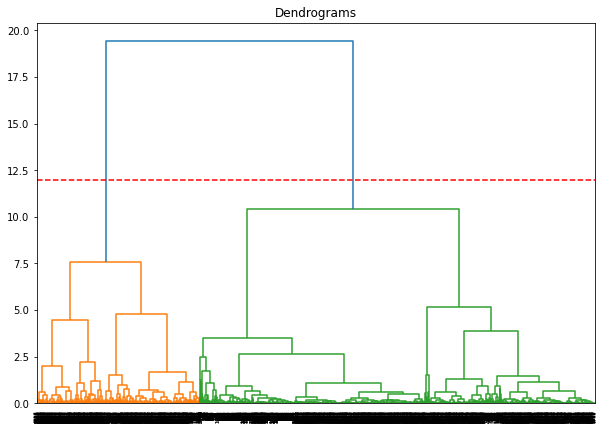

[0 0 0 ... 0 1 0]


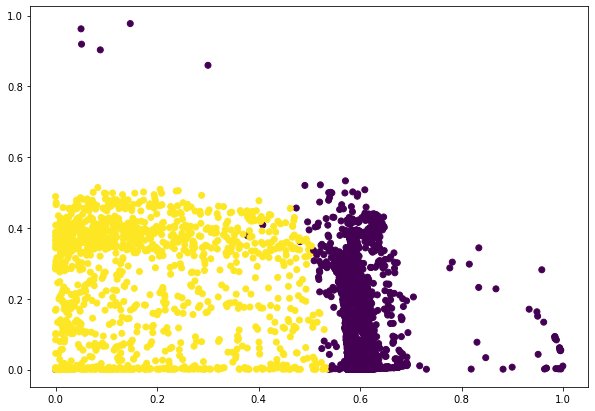

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Wuzzuf_Jobs.csv')
Labels = ['Title','Company','Location','Type','Level','YearsExp','Country','Skills']
for i in range (8):
    data[Labels[i]]=pd.factorize(data[Labels[i]])[0]
# print(data.head())
from sklearn.preprocessing import normalize
x = normalize(data)
x = pd.DataFrame(x, columns=data.columns)
# print(x.head())

data_scaled = x.iloc[:,:]
# print(data_scaled.head())
import scipy.cluster.hierarchy as shc
# # plt.figure(figsize=(10, 7))
# # plt.title("Dendrograms")
# # dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=12, color='r', linestyle='--')
plt.show()

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)
print(cluster.labels_)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Title'], data_scaled['Company'], c=cluster.labels_)
plt.show()